# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [244]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$. 

**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.



*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

1.
$$ \sum \limits_{i=1}^n (y_i - \theta x_i)^2 \rightarrow \min\limits_{\theta \in \mathbb{R}}$$

$$ \frac{\partial }{\partial \theta}[ \sum \limits_{i=1}^n (y_i - \theta x_i)^2 ] = 0 $$

$$ 2 \sum \limits_{i=1}^n (y_i - \theta x_i) \cdot (-x_i) = 0 $$ 

$$ \sum \limits_{i=1}^n (x_iy_i - \theta x_i^2) = 0 \Rightarrow \widehat{\theta} = \frac{\sum \limits_{i=1}^n x_iy_i}{\sum \limits_{i=1}^n x_i^2} 
$$

2. GD:
$$ \theta_{t+1} = \theta_t - \eta \cdot X^T(X \theta_t - Y) $$
Матрицы X и Y лежат в $\mathbb{R}^{n \times 1}$, значит шаг GD можно представить так:

$$ \theta_{t+1} = \theta_t - \eta \sum \limits_{i=1}^n (x_i \theta_t - y_i) x_i $$

    SGD:
    
$$ \theta_{t+1} = \theta_t - \eta \cdot (\frac{n}{k}) \sum \limits_{j=1}^k (x_{i_j} \theta_t - y_{i_j}) x_{i_j}, $$
где $i_1, \dots, i_k \in U\{1, \dots, n\}$ $-$ номера объектов (с повторениями), а $x_{i_j}$ $-$ соответствующие этим объектам значения признака. На каждой итерации $i_j$ пересчитываются.

3.
$$ 
\mathsf{E}\widehat{\theta} = \mathsf{E}\Big(\frac{\sum \limits_{i=1}^n x_iy_i}{\sum \limits_{i=1}^n x_i^2}\Big) = \frac{\mathsf{E} (\sum \limits_{i=1}^n x_iy_i)}{\mathsf{E} (\sum \limits_{i=1}^n x_i^2)} = 
\frac{\sum \limits_{i=1}^n \mathsf{E}(x_iy_i)}{\sum \limits_{i=1}^n \mathsf{E}(x_i^2)}
$$
Так как $x_i - $ не случайны, то $\mathsf{E}(x_i) = x_i$
$$ 
\frac{\sum \limits_{i=1}^n x_i\mathsf{E}(y_i)}{\sum \limits_{i=1}^n x_i^2} = 
\frac{\sum \limits_{i=1}^n x_i(\theta x_i)}{\sum \limits_{i=1}^n x_i^2} = 
\frac{\theta \sum \limits_{i=1}^n x_i^2}{\sum \limits_{i=1}^n x_i^2} = 
\theta
$$
Здесь мы использовали $\mathsf{E}y_i = \mathsf{E}(\theta x_i + \varepsilon_i) = x_i \mathsf{E}\theta + \mathsf{E} \varepsilon_i = \theta x_i$

Теперь найдём $\mathsf{E}\widehat{y}(x)$:
$$
\mathsf{E}\widehat{y}(x) = \mathsf{E}(\widehat{\theta} x) = \mathsf{E}(\widehat{\theta}) x = \theta x
$$

4.
$$ 
\mathsf{D}\widehat{\theta} = \mathsf{E}\widehat{\theta}^2 - (\mathsf{E}\widehat{\theta})^2$$
Используем результат предыдущего пункта $(\mathsf{E}\widehat{\theta})^2 = \theta^2$. Найдём $\mathsf{E}\widehat{\theta}^2$:
$$
\mathsf{E}\widehat{\theta}^2 = 
\mathsf{E}\Big(\frac{(\sum \limits_{i=1}^n x_iy_i)^2}{(\sum \limits_{i=1}^n x_i^2)^2}\Big) 
= \frac{\mathsf{E}(\sum \limits_{i=1}^n x_iy_i)^2}{\mathsf{E}(\sum \limits_{i=1}^n x_i^2)^2}
= \frac{\sum \limits_{i=1}^n x_i^2 \mathsf{E}y_i^2 + 2 \sum \limits_{i<j} x_ix_j\mathsf{E}(y_iy_j) }{(\sum \limits_{i=1}^n x_i^2)^2}
$$


Найдём $\mathsf{E}y_i^2$ и $\mathsf{E}y_iy_j$:


$$
\mathsf{E}y_i^2 = \mathsf{E}(x_i\theta + \varepsilon_i)^2 = \mathsf{E}(x_i^2\theta^2 + 2x_i\theta \varepsilon_i + \varepsilon_i^2) = x_i^2\theta^2 + \sigma^2
$$


Здесь мы использовали, что $x_i-$ не случайны, а также $\mathsf{E}x_i \varepsilon_i = x_i\mathsf{E}\varepsilon_i = 0$ и $\mathsf{E}\varepsilon_i^2 = \mathsf{D}\varepsilon_i + (\mathsf{E}\varepsilon_i)^2 = \sigma^2$




$$
\mathsf{E}y_iy_j = \mathsf{E}(x_i\theta + \varepsilon_i)(x_j\theta + \varepsilon_j) = \mathsf{E}(x_ix_j\theta^2 + x_i\theta \varepsilon_j + x_j\theta \varepsilon_i + \varepsilon_i \varepsilon_j) = x_ix_j\theta^2 + \mathsf{E}\varepsilon_i \varepsilon_j =  x_ix_j\theta^2,
$$
так как $\varepsilon_i$ и $\varepsilon_j - $ независимы по условию.

Получаем:

$$
\frac{\sum \limits_{i=1}^n x_i^2 \mathsf{E}y_i^2 + 2\sum \limits_{i<j} x_ix_j\mathsf{E}(y_iy_j) }{(\sum \limits_{i=1}^n x_i^2)^2} = 
\frac{\sum \limits_{i=1}^n x_i^2 (x_i^2\theta^2 + \sigma^2) + 2\sum \limits_{i<j} x_ix_j(x_ix_j\theta^2) }{(\sum \limits_{i=1}^n x_i^2)^2} = 
\frac{\sigma^2 \sum \limits_{i=1}^n x_i^2 + \theta^2 (\sum \limits_{i=1}^n x_i^4 + 2\sum \limits_{i<j} x_i^2x_j^2) }{(\sum \limits_{i=1}^n x_i^2)^2} = 
\frac{\sigma^2 \sum \limits_{i=1}^n x_i^2 + \theta^2 (\sum \limits_{i=1}^n x_i^2)^2 }{(\sum \limits_{i=1}^n x_i^2)^2}=
$$


$$
= \frac{\sigma^2}{\sum \limits_{i=1}^n x_i^2} + \theta^2 = \mathsf{E}\widehat{\theta}^2
$$


Итого:


$$
\mathsf{D}\widehat{\theta} = \frac{\sigma^2}{\sum \limits_{i=1}^n x_i^2} + \theta^2 - \theta^2 = \frac{\sigma^2}{\sum \limits_{i=1}^n x_i^2}
$$

Аналогичным способом найдём $\mathsf{D}\widehat{y}(x)$:
$$ \mathsf{D}\widehat{y}(x) = \mathsf{D}(\widehat{\theta} x) = x^2 \mathsf{D}\widehat{\theta} = \frac{x^2 \sigma^2}{\sum \limits_{i=1}^n x_i^2}
$$

5.
Дисперсии конечны, если признаки в матрице $X$ линейно независимы.

Если в матрице $X$ есть линейно зависимые столбцы, то матрица $X^TX$ будет близка к вырожденной, что приводит к неопределенности и неустойчивости оценки коэффициентов регрессии и дисперсии предсказания, так как обратная матрица может иметь очень большие элементы.

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

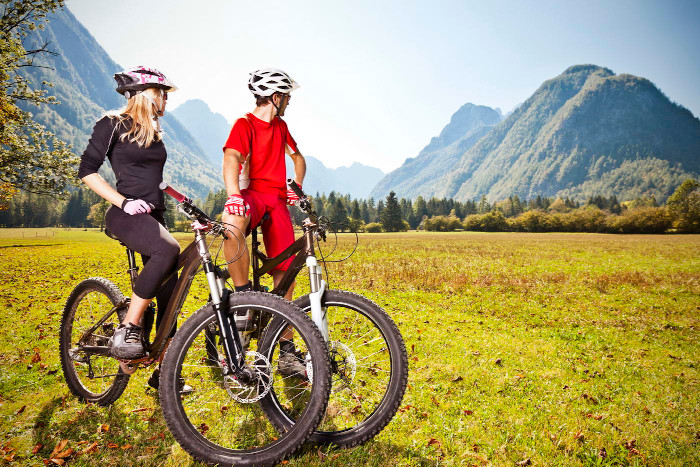

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [260]:
df = pd.read_csv('day.csv')

columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
features, target = columns[:-1], columns[-1]
df = df[columns]
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [261]:
train, test = train_test_split(df, test_size=0.2, shuffle=True)

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [262]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

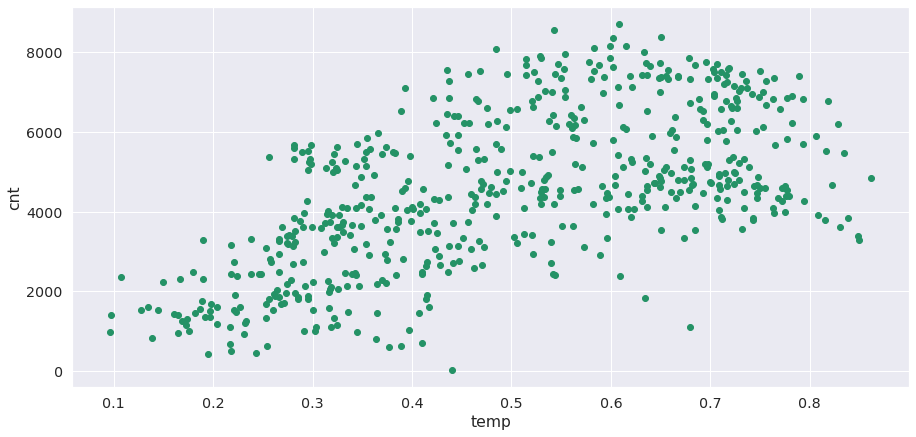

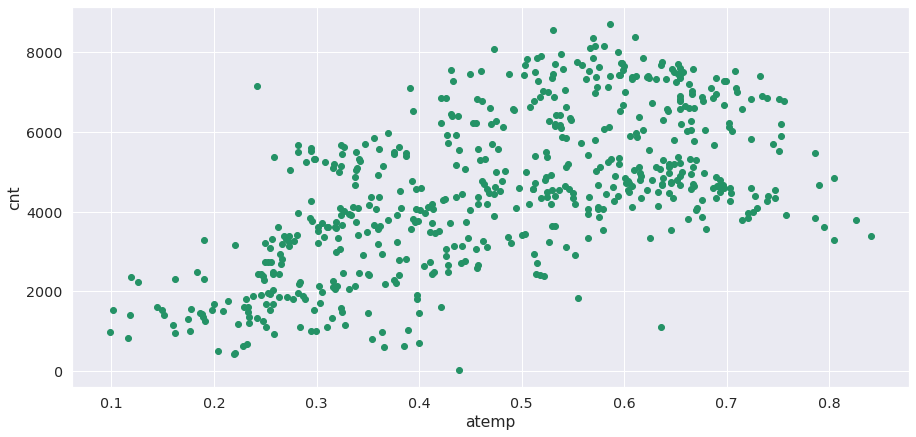

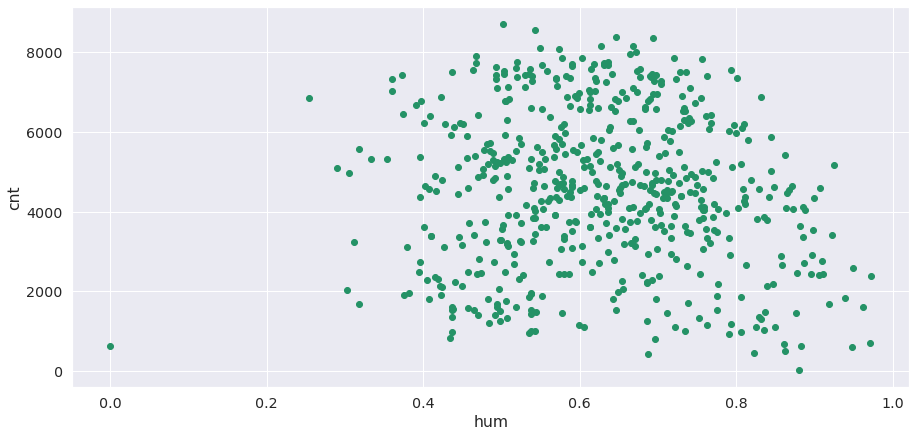

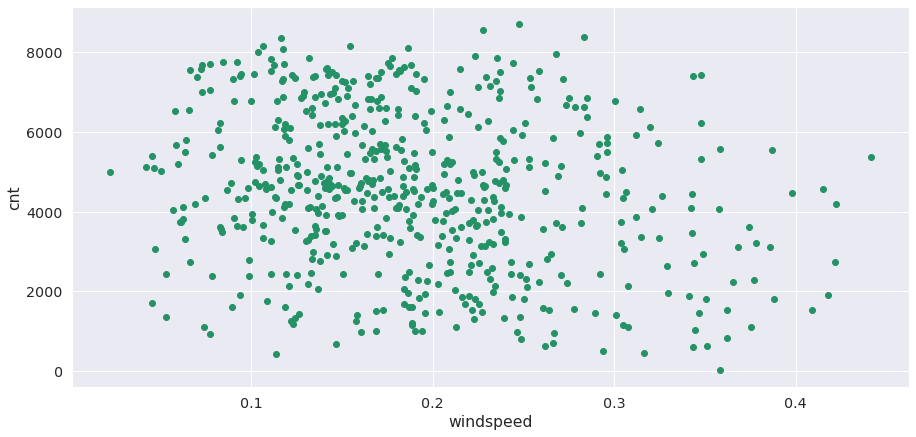

In [263]:
sns.set(font_scale=1.3, palette='summer')

for real in real_features:
    plt.figure(figsize=(15, 7))
    plt.scatter(x=train[real], y=train[target_feature], alpha=1)
    plt.xlabel('{}'.format(real))
    plt.ylabel('cnt')
    plt.show()

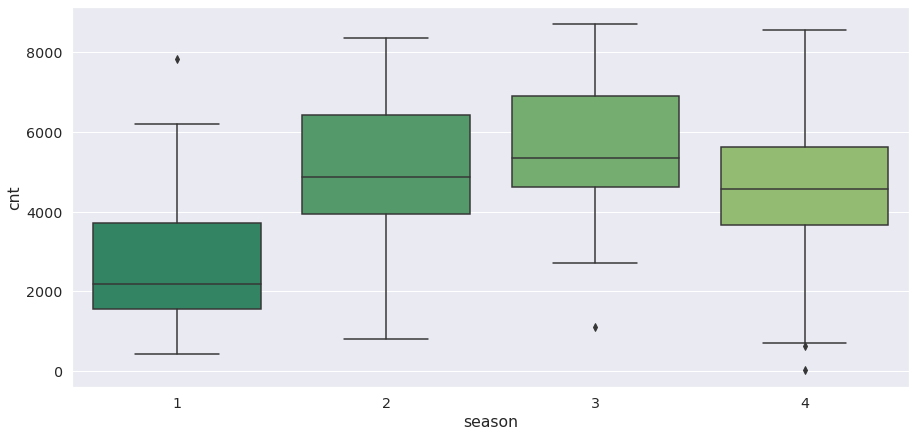

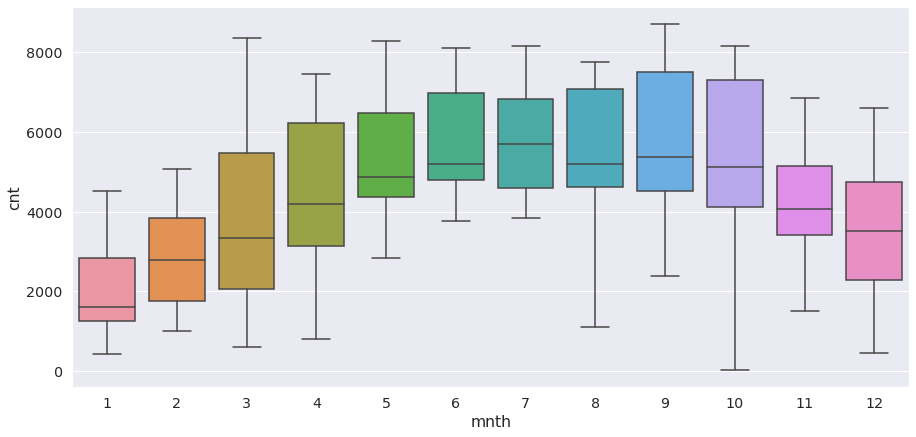

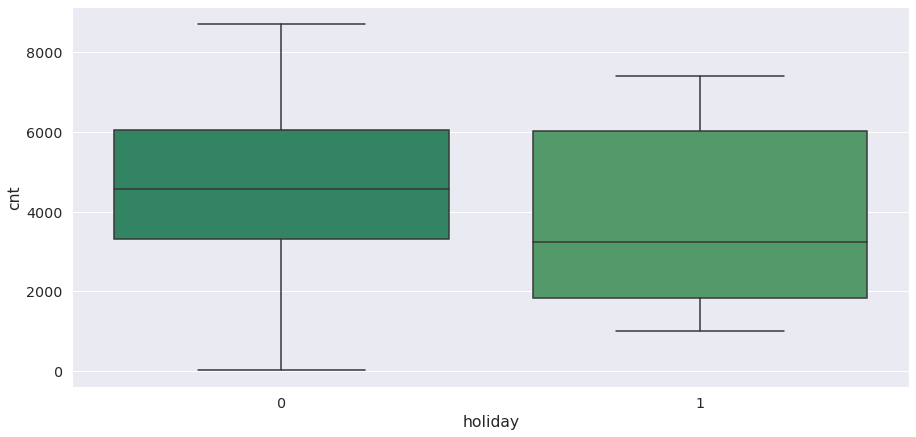

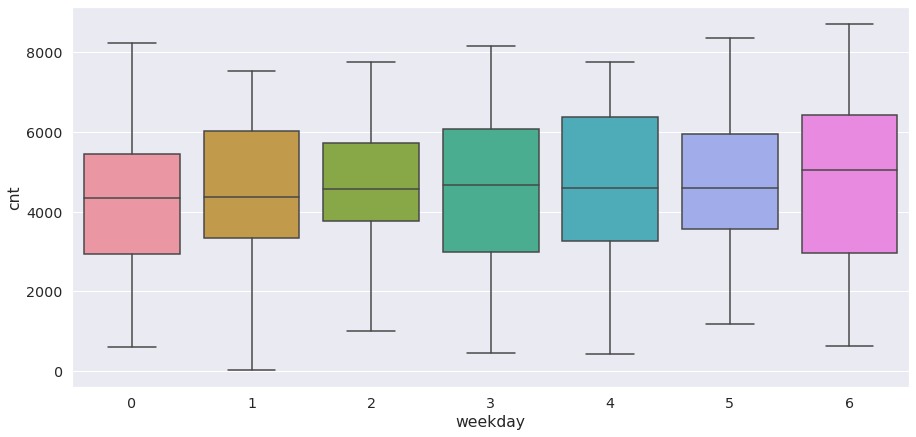

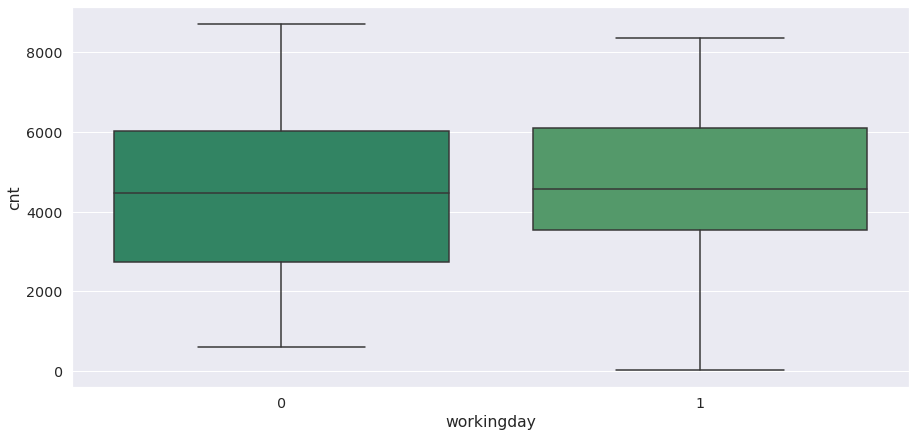

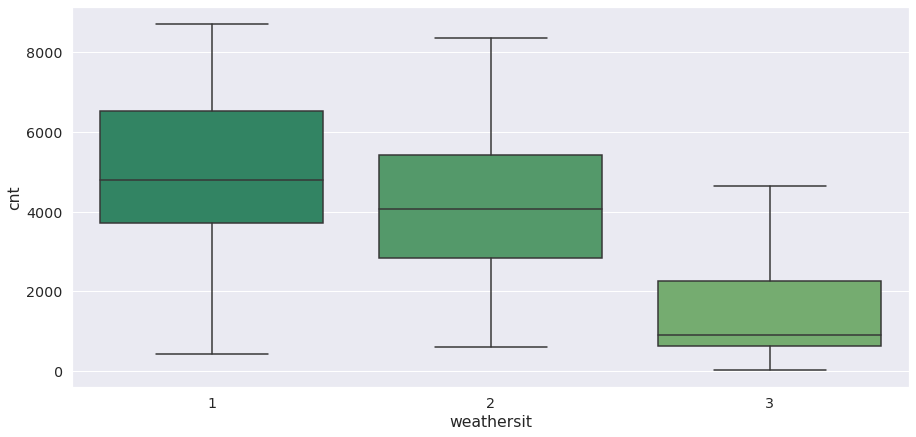

In [239]:
for cat in categorial_features:
    plt.figure(figsize=(15, 7))
    sns.boxplot(x=train[cat], y=train[target_feature])
    plt.xlabel('{}'.format(cat))
    plt.ylabel('cnt')
    plt.show()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

Имеется небольшое количество выбросов по вещественным признакам Влажности, Скорости ветра и Температур. Когда будем преобразовывать данные, проведём их фильтрацию, но несильную, потому что таких выбросов мало.

По графикам видно, что усложнять зависимость до индикаторной, логарифической не имеет особого смысла, так как все данные довольно хорошо могут уложиться и под прямую. Но, возможно, стоит проверить температуру на квадратичную, так как после какого-то значения температуры количество арендованных велосипедов начинает падать, что линейная зависимость нам не покажет.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**a).** Обрежем некоторые признаки по значению, чтобы избавиться от выбросов, а так же испольхуем OneHotEncoder для категориальных признаков.

Реализуйте данную процедуру.

In [240]:
train = train[train['hum'] >= 0.3]
train = train[train['windspeed'] <= 0.35]
train = train[train['atemp'] <= 0.8]
train = train[train['temp'] <= 0.8]
train = train[train['atemp'] >= 0.2]
train = train[train['temp'] >= 0.2]

encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[categorial_features])

x_train = np.hstack([train[real_features], train_cat])
y_train = train[target_feature]

x_train.shape

(530, 28)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [241]:
reg = LinearRegression(fit_intercept=True)
reg.fit(x_train, y_train) 

reg.coef_, reg.intercept_

(array([ 6392.13007046,  2209.42924173, -4062.89920799, -3220.10022818,
          729.91871237,   567.77194207,  1540.2630342 ,   111.96219915,
          121.1015368 ,  -334.17395506,  -339.16107981,  -990.20903384,
        -1128.13964445,  -987.36599168,   -64.31145829,  -114.1986353 ,
         -690.39631232,  -377.87712904,  -521.06271618,   -91.41030311,
          -97.16955003,   -88.67726734,   -60.8589038 ,    98.45369257,
          567.27775973,   281.40038446,   -41.20346403, -1135.76319042]),
 3072.5574417261896)

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [242]:
test = test[test['hum'] >= 0.3]
test = test[test['windspeed'] <= 0.35]
test = test[test['atemp'] <= 0.8]
test = test[test['temp'] <= 0.8]
test = test[test['atemp'] >= 0.2]
test = test[test['temp'] >= 0.2]

encoder = OneHotEncoder(drop='first', sparse=False)
test_cat = encoder.fit_transform(test[categorial_features])

x_test = np.hstack([test[real_features], test_cat])
y_test = test[target_feature]

y_pred = reg.predict(x_test)

def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

print("RMSE = ", metrics.mean_squared_error(y_test, y_pred) ** 0.5)
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

RMSE =  1224.6968313227658
MAE =  1070.8470438383322
MAPE =  30.18447476499531


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Значения в матрице получаются очень большими, значит матрица $X^TX$ была близка к вырожденной, что говорит нам о зависимости признаков. Попробуем убрать Температуру из признаков, так как её значения близки к Температуре по ощущениям.

In [258]:
train, test = train_test_split(df, test_size=0.2, shuffle=True)

categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

train = train[train['hum'] >= 0.3]
train = train[train['windspeed'] <= 0.35]
train = train[train['atemp'] <= 0.8]
train = train[train['temp'] <= 0.8]
train = train[train['atemp'] >= 0.2]
train = train[train['temp'] >= 0.2]

encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[categorial_features])

x_train = np.hstack([np.ones(train.shape[0]).reshape(-1, 1), train[real_features], train_cat])
y_train = train[target_feature]

coefs = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
coefs

array([-1.09604961e+04, -1.53657736e+06,  1.57465205e+06, -1.12166513e+04,
        1.74478037e+04,  2.84908500e+03,  9.52038549e+03,  1.78528245e+03,
        3.86258899e+03,  1.65897721e+04,  1.70693605e+04,  4.45446765e+04,
        5.75515595e+04,  6.54454352e+04,  7.78719917e+04,  5.18319925e+04,
        1.57649210e+04,  1.00735953e+04,  4.98298826e+03, -1.57046945e+04,
       -1.42018190e+04, -3.46844573e+03,  9.63868909e+03,  1.03280541e+04,
        1.01019929e+04,  6.21636615e+02, -3.26632536e+03, -2.53175599e+02,
       -1.64898759e+03])

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [265]:
train, test = train_test_split(df, test_size=0.2, shuffle=True)

categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
real_features = ['atemp', 'hum', 'windspeed']
target_feature = 'cnt'

train = train[train['hum'] >= 0.3]
train = train[train['windspeed'] <= 0.35]
train = train[train['atemp'] <= 0.8]
train = train[train['atemp'] >= 0.2]
train = train.drop('temp', axis=1)

encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train[categorial_features])

x_train = np.hstack([np.ones(train.shape[0]).reshape(-1, 1), train[real_features], train_cat])
y_train = train[target_feature]

coefs = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

test = test[test['hum'] >= 0.3]
test = test[test['windspeed'] <= 0.35]
test = test[test['atemp'] <= 0.8]
test = test[test['atemp'] >= 0.2]
test = test.drop('temp', axis=1)

encoder = OneHotEncoder(drop='first', sparse=False)
test_cat = encoder.fit_transform(test[categorial_features])

x_test = np.hstack([np.ones(test.shape[0]).reshape(-1, 1), test[real_features], test_cat])
y_test = test[target_feature]

y_pred = x_test @ coefs

print("RMSE = ", metrics.mean_squared_error(y_test, y_pred) ** 0.5)
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))
print("MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

RMSE =  2229.700511527042
MAE =  1867.8395576372877
MAPE =  55.358630075850165


Сделайте выводы.

**Выводы:**

Очень важно следить за признаками, так как если среди них есть зависимые, то они портят все вычисления. Поэтому в OneHotEncoding мы удаляли одну из колонок, а также удалили одну из двух практически одинаковых по своей сути колонок.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

$$ \| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta $$
$$\frac{\partial }{\partial \theta_k} \Big[\| Y - X\theta \|^2 + \lambda \| \theta \|^2\Big] = -2X^T(Y - X\theta) + 2\lambda \theta = 0 $$
Jценка коэффицентов будет выглядеть следующим образом:
$$
\theta = (X^TX + \lambda E)^{-1}X^TY,
$$
где матрица $E \in \mathbb{R}^{d \times d} -$ единичная.

В случае МНК оценка выглядит так:
$$
\theta = (X^TX)^{-1}X^TY
$$
Да, оценка параметров в модели Ridge-регрессии помогает избежать проблемы обратимости матрицы в МНК. Получившаяся матрица решает проблему неустойчивости, если матрица $X^TX$ близка к вырожденной, а также гарантирует существование решения.

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

GD:


$$ \theta_{t+1} = \theta_t - \eta \cdot (-2X^T(Y - X\theta_t) + 2\lambda \theta_t)$$


SGD:


Градиент функции потерь можно выразить следующим образом:


$$
\nabla L_i(\theta) = -2x_i (y_i - x_i^T\theta) + 2\lambda \theta
$$


Тогда шаг в SGD будет выглядеть следующим образом:


$$ \theta_{t+1} = \theta_t - \eta \cdot \sum \limits_{j=1}^k (-x_{i_j}^T (y_{i_j} - x_{i_j}\theta_t) + \lambda \theta_t), $$
где $i_1, \dots, i_k \in U\{1, \dots, n\}$ $-$ номера объектов (с повторениями), а $x_{i_j}, y_{i_j}$ $-$ соответствующие этим объектам значения признака и целевой переменной. На каждой итерации $i_j$ пересчитываются.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

В Ridge-регрессии необходима cтандартизация признаков, потому что штраф на оценки коэффициентов выражается через  меру расстояния между векторами. При разных единицах измерения расстояние между объектами будет сильно зависеть от используемых в модели признаков и их единицы измерения. В результате, оценки коэффициентов могут сильно различаться для разных признаков, что может приводить к занижению или завышению коэффицентов.

# ХОТЕЛ БЫ ДОДЕЛАТЬ)

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

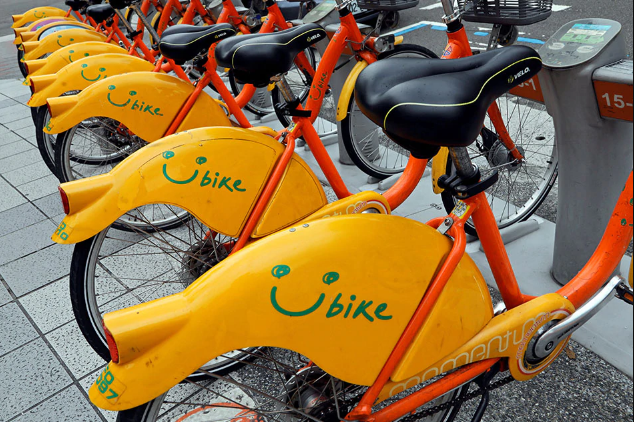

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [ ]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        <...>
        
        return self
    
    
    def predict(X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания
        <...>
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Сделайте выводы.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

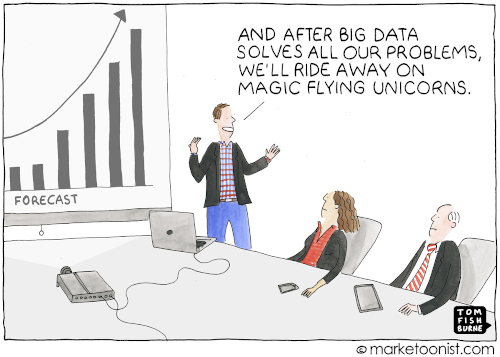

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.